<img src = 'https://ichi.pro/assets/images/max/724/1*-REN2wCkTiWKo66_kSPP2g.png'>

## Contents

- Load Dataset
- import Pycaret
- Setting Enviroment in Pycaret
- Compare All Models
- Create Model
- Model Data Visualization
- Blending Model
- predict test Data
- submission

# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./tabular-playground-series-feb-2022/train.csv')
test_df = pd.read_csv('./tabular-playground-series-feb-2022/test.csv')

row_id = test_df['row_id']
train_df = train_df.drop('row_id', axis = 1)
test_df = test_df.drop('row_id', axis = 1)

train_df.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


# Import Pycaret

In [7]:
# !pip install pycaret

### It is still in the early stage, sometimes there's an error, but it's well Work. Don't Worry

In [2]:
from pycaret.classification import *

mult_classification = setup(data = train_df, target = 'target', session_id = 123, fold_shuffle= True, train_size = 0.8, use_gpu= True)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"Bacteroides_fragilis: 0, Campylobacter_jejuni: 1, Enterococcus_hirae: 2, Escherichia_coli: 3, Escherichia_fergusonii: 4, Klebsiella_pneumoniae: 5, Salmonella_enterica: 6, Staphylococcus_aureus: 7, Streptococcus_pneumoniae: 8, Streptococcus_pyogenes: 9"
4,Original Data,"(200000, 287)"
5,Missing Values,False
6,Numeric Features,286
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

# Compare All Models
<hr>

it work default 10 times KFOLD and if you want to change fold parameter,you can use parameter  ex (fold = 5)

The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the sort parameter.

**but It's so slow. if you want to see run code.**

In [ ]:
# best_model = compare_models(n_select = 4, fold = 5, ex)

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:37:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9898,0.9999,0.9898,0.9898,0.9898,0.9887,0.9887,10.2540
dt,Decision Tree Classifier,0.9650,0.9806,0.9650,0.9651,0.9650,0.9611,0.9611,16.5600
knn,K Neighbors Classifier,0.9535,0.9953,0.9535,0.9536,0.9535,0.9483,0.9483,143.2220
ridge,Ridge Classifier,0.6658,0.0000,0.6660,0.6909,0.6513,0.6287,0.6350,0.5540
lr,Logistic Regression,0.6404,0.9147,0.6404,0.6707,0.6464,0.6004,0.6033,20.3640
qda,Quadratic Discriminant Analysis,0.6123,0.8987,0.6124,0.6462,0.5553,0.5692,0.5846,2.1180
nb,Naive Bayes,0.4545,0.8834,0.4553,0.5314,0.4483,0.3941,0.4093,1.3740
svm,SVM - Linear Kernel,0.4484,0.0000,0.4488,0.6385,0.3923,0.3872,0.4151,1.3320
ada,Ada Boost Classifier,0.3203,0.7696,0.3204,0.3593,0.2964,0.2447,0.2556,60.3800


You can see available model

In [3]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# Create Varity Model

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. 

As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter.

This selector mean top performing or idea for this type of data. (just, illustration)

In [4]:
Ext_Classifier = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9939,0.9999,0.9939,0.9939,0.9939,0.9932,0.9932
1,0.9926,0.9999,0.9926,0.9926,0.9926,0.9917,0.9917
2,0.9926,0.9999,0.9926,0.9926,0.9926,0.9918,0.9918
3,0.9919,0.9999,0.9919,0.9919,0.9919,0.9910,0.9910
4,0.9925,0.9999,0.9925,0.9925,0.9925,0.9917,0.9917
5,0.9922,0.9999,0.9922,0.9922,0.9922,0.9913,0.9913
6,0.9931,0.9999,0.9931,0.9931,0.9931,0.9923,0.9923
7,0.9928,0.9999,0.9928,0.9928,0.9927,0.9919,0.9919
8,0.9920,0.9999,0.9920,0.9920,0.9920,0.9911,0.9911
9,0.9929,1.0000,0.9929,0.9929,0.9929,0.9922,0.9922


In [5]:
Rf_Classifier = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9936,0.9999,0.9936,0.9936,0.9936,0.9929,0.9929
1,0.9916,0.9999,0.9916,0.9916,0.9916,0.9906,0.9906
2,0.9921,0.9999,0.9921,0.9921,0.9921,0.9912,0.9912
3,0.9917,0.9999,0.9917,0.9917,0.9917,0.9908,0.9908
4,0.9926,0.9999,0.9926,0.9926,0.9926,0.9918,0.9918
5,0.9929,0.9999,0.9929,0.9929,0.9929,0.9921,0.9921
6,0.9928,0.9999,0.9928,0.9928,0.9927,0.9919,0.9919
7,0.9920,0.9999,0.9920,0.9920,0.9920,0.9911,0.9911
8,0.9918,0.9999,0.9918,0.9918,0.9918,0.9909,0.9909
9,0.9926,0.9999,0.9926,0.9926,0.9926,0.9917,0.9917


In [7]:
dt_Classifier = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9719,0.9844,0.9719,0.9720,0.9719,0.9687,0.9688
1,0.9717,0.9843,0.9717,0.9717,0.9717,0.9685,0.9685
2,0.9705,0.9836,0.9705,0.9705,0.9705,0.9672,0.9672
3,0.9692,0.9829,0.9692,0.9693,0.9693,0.9658,0.9658
4,0.9685,0.9825,0.9685,0.9685,0.9685,0.9650,0.9650
5,0.9710,0.9839,0.9710,0.9711,0.9710,0.9678,0.9678
6,0.9708,0.9838,0.9708,0.9708,0.9708,0.9676,0.9676
7,0.9716,0.9842,0.9716,0.9716,0.9716,0.9685,0.9685
8,0.9692,0.9829,0.9692,0.9693,0.9692,0.9658,0.9658
9,0.9715,0.9842,0.9715,0.9715,0.9715,0.9683,0.9683


In [10]:
knn_Classifier = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9608,0.9968,0.9608,0.9608,0.9607,0.9564,0.9564
1,0.9574,0.9961,0.9574,0.9575,0.9574,0.9527,0.9527
2,0.9601,0.9964,0.9601,0.9602,0.9601,0.9557,0.9557
3,0.9557,0.9955,0.9557,0.9558,0.9557,0.9508,0.9508
4,0.9536,0.9960,0.9536,0.9538,0.9536,0.9484,0.9484
5,0.9590,0.9962,0.9590,0.9591,0.9590,0.9544,0.9545
6,0.9571,0.9964,0.9571,0.9572,0.9571,0.9524,0.9524
7,0.9559,0.9962,0.9559,0.9561,0.9559,0.9510,0.9510
8,0.9580,0.9956,0.9580,0.9582,0.9580,0.9533,0.9533
9,0.9569,0.9965,0.9569,0.9571,0.9569,0.9522,0.9522


# Data & Model Visualization

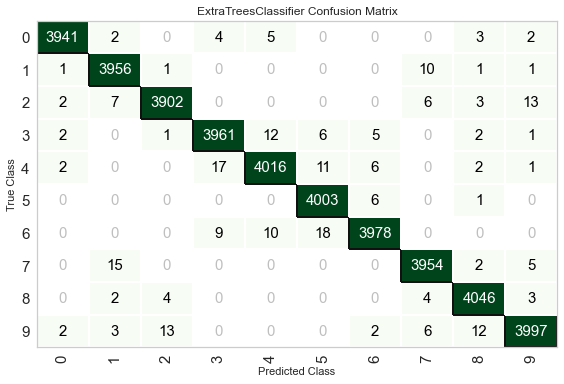

In [11]:
plot_model(Ext_Classifier, plot = 'confusion_matrix')

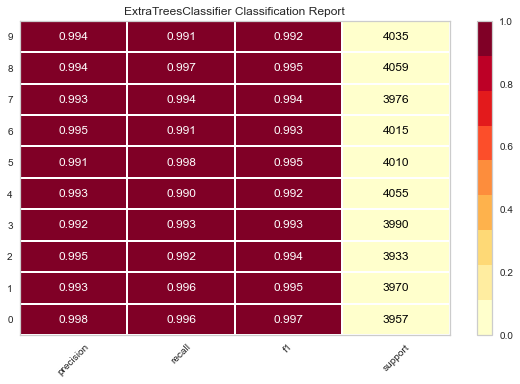

In [12]:
plot_model(Ext_Classifier, plot = 'class_report')

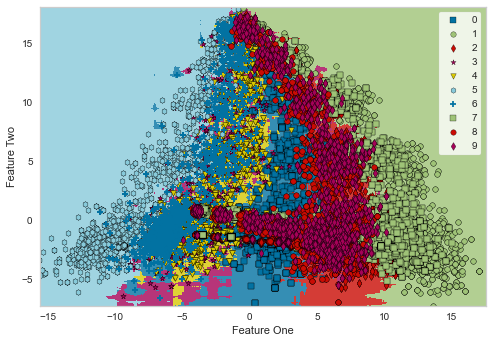

In [13]:
plot_model(Ext_Classifier, plot='boundary')

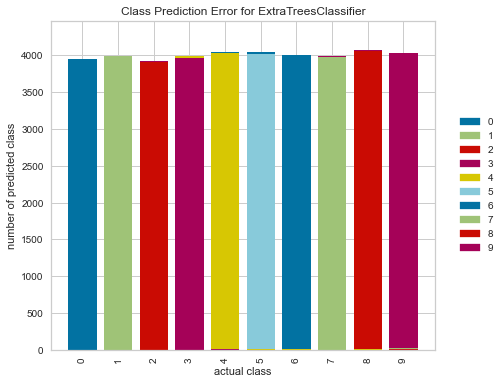

In [14]:
plot_model(Ext_Classifier, plot = 'error')

# Blending Model

In [14]:
# blender = blend_models(estimator_list = [Ext_Classifier, Rf_Classifier, dt_Classifier, knn_Classifier])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9894,0.9999,0.9894,0.9895,0.9894,0.9883,0.9883
1,0.9883,0.9999,0.9883,0.9883,0.9883,0.9870,0.9870
2,0.9880,0.9999,0.9880,0.9880,0.9880,0.9867,0.9867
3,0.9879,0.9999,0.9879,0.9879,0.9879,0.9865,0.9865
4,0.9881,0.9999,0.9881,0.9881,0.9881,0.9867,0.9867
5,0.9886,0.9999,0.9886,0.9886,0.9886,0.9873,0.9873
6,0.9885,0.9999,0.9885,0.9885,0.9885,0.9872,0.9872
7,0.9875,0.9999,0.9875,0.9875,0.9875,0.9861,0.9861
8,0.9863,0.9999,0.9863,0.9863,0.9863,0.9848,0.9848
9,0.9883,0.9999,0.9883,0.9883,0.9883,0.9870,0.9870


# Stacking Model

In [19]:
# stacking = stack_models(estimator_list = [Ext_Classifier, Rf_Classifier, dt_Classifier, knn_Classifier])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9936,1.0000,0.9936,0.9936,0.9936,0.9928,0.9928
1,0.9933,1.0000,0.9933,0.9933,0.9933,0.9926,0.9926
2,0.9932,1.0000,0.9932,0.9932,0.9932,0.9924,0.9924
3,0.9922,1.0000,0.9922,0.9923,0.9922,0.9914,0.9914
4,0.9929,1.0000,0.9929,0.9929,0.9929,0.9921,0.9921
5,0.9930,1.0000,0.9930,0.9930,0.9930,0.9922,0.9922
6,0.9936,1.0000,0.9936,0.9936,0.9936,0.9928,0.9928
7,0.9930,1.0000,0.9930,0.9930,0.9930,0.9922,0.9922
8,0.9920,1.0000,0.9920,0.9920,0.9920,0.9911,0.9911
9,0.9938,1.0000,0.9938,0.9938,0.9938,0.9931,0.9931


# Ensemble Model
- Method for ensembling base estimator. It can be ‘Bagging’ or ‘Boosting

In [23]:
ensemble = ensemble_model(Ext_Classifier, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9936,0.9999,0.9936,0.9936,0.9936,0.9929,0.9929
1,0.9926,0.9999,0.9926,0.9926,0.9926,0.9917,0.9917
2,0.9918,0.9999,0.9918,0.9918,0.9918,0.9909,0.9909
3,0.9921,0.9999,0.9921,0.9921,0.9921,0.9912,0.9912
4,0.9922,0.9999,0.9923,0.9923,0.9923,0.9914,0.9914
5,0.9932,0.9999,0.9932,0.9932,0.9932,0.9924,0.9924
6,0.9919,0.9999,0.9919,0.9919,0.9919,0.9910,0.9910
7,0.9923,0.9999,0.9923,0.9923,0.9923,0.9915,0.9915
8,0.9922,0.9999,0.9922,0.9922,0.9922,0.9913,0.9913
9,0.9926,0.9999,0.9926,0.9926,0.9926,0.9917,0.9917


# Submit & Conclusion

In [24]:
# blen_label = predict_model(blender, data = test_df)
# stack_label = predict_model(stacking, data = test_df)
ensemble_label = predict_model(ensemble, data = test_df)

In [25]:
# choose option!
# submit = pd.DataFrame({
#     'row_id' : row_id,
#     'target' : blen_label['Label']
# })

# submit.to_csv('submission(blend).csv', index = False)

# submit = pd.DataFrame({
#     'row_id' : row_id,
#     'target' : stack_label['Label']
# })

# submit.to_csv('submission(stack).csv', index = False)

submit = pd.DataFrame({
    'row_id' : row_id,
    'target' : ensemble_label['Label']
})

submit.to_csv('submission(Ensemble).csv', index = False)